## This notebook assumes you have the following packages installed in your conda environment.

In [1]:
import pandas as pd
import json
import community
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np
import randomcolor

In [2]:
df_default = pd.read_csv('../data/signdata_updated11-18.csv', encoding='latin-1')
df_default.shape
df_old = pd.read_csv('../data/signdata-11-5-20.csv')
df_old_subset = df_old[['Code','YouTube Video', 'VimeoVideo', 'VimeoVideoHTML']].copy()
df_default = df_default.merge(df_old_subset, on='Code', how='left')
df_default.head()

,EntryID,LemmaID,Code,Batch,List,Item,EnglishWF(lg10),SignFrequency(M),SignFrequency(SD),SignFrequency(Z),...,SignBankLemmaID,SignBankSemanticField,SignBankReferenceID,InCDI,CDISemanticCategory,bglm_aoa,empirical_aoa,YouTube Video,VimeoVideo,VimeoVideoHTML
0,tree,tree,A_01_002,A,1,2,3.521,5.143,2.081,0.621,...,TREE,None,342.0,Yes,Outside Things and Places to Go,22.0,14.0,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216264,<iframe src=https://player.vimeo.com/video/344...
1,night,night,A_01_003,A,1,3,4.645,6.032,1.516,1.068,...,NIGHT,None,199.0,Yes,Signs About Time,31.0,18.0,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216312,<iframe src=https://player.vimeo.com/video/344...
2,hamburger,hamburger,A_01_004,A,1,4,2.600,4.429,1.720,0.232,...,HAMBURGER,None,1844.0,Yes,Food and Drink,32.0,28.0,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216345,<iframe src=https://player.vimeo.com/video/344...
3,nephew,nephew,A_01_005,A,1,5,2.928,2.621,1.720,-0.753,...,NEPHEW,People,3011.0,No,NaN,NaN,NaN,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216367,<iframe src=https://player.vimeo.com/video/344...
4,castle,castle,A_01_008,A,1,8,3.041,1.579,0.838,-1.198,...,CASTLE,None,2471.0,No,Action Signs,NaN,NaN,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216403,<iframe src=https://player.vimeo.com/video/344...


In [7]:
handshapeImages = pd.read_csv('../data/HandshapeImages.csv')
for index,imageURL in enumerate(handshapeImages['HandshapeImage']):
    newURL = imageURL[:5] + "width=\"100\" height=\"100\" " + imageURL[5:]
    handshapeImages.loc[index,'HandshapeImage'] = newURL
handshapeImages = handshapeImages[['Code','HandshapeImage']]

In [8]:
df_default = df_default.merge(handshapeImages, on='Code', how='left')

In [10]:
grouping_set = []
for index,imageURL in enumerate(df_default['HandshapeImage']):
    urlDict = {}
    urlDict["ID"] = df_default.loc[index,'Handshape.2.0']
    print(imageURL)
    urlDict["value"] = imageURL
    if urlDict not in grouping_set:
        grouping_set.append(urlDict)

<img width="100" height="100" src="https://aslcdi.website/images/handshape_images/5.png" />
<img width="100" height="100" src="https://aslcdi.website/images/handshape_images/flat_b.png" />
<img width="100" height="100" src="https://aslcdi.website/images/handshape_images/c.png" />
<img width="100" height="100" src="https://aslcdi.website/images/handshape_images/flat_n.png" />
<img width="100" height="100" src="https://aslcdi.website/images/handshape_images/curved_v.png" />
<img width="100" height="100" src="https://aslcdi.website/images/handshape_images/1.png" />
<img width="100" height="100" src="https://aslcdi.website/images/handshape_images/c.png" />
<img width="100" height="100" src="https://aslcdi.website/images/handshape_images/c.png" />
<img width="100" height="100" src="https://aslcdi.website/images/handshape_images/bent_l.png" />
<img width="100" height="100" src="https://aslcdi.website/images/handshape_images/flat_h.png" />
<img width="100" height="100" src="https://aslcdi.web

<img width="100" height="100" src="https://aslcdi.website/images/handshape_images/open_b.png" />
<img width="100" height="100" src="https://aslcdi.website/images/handshape_images/s.png" />
<img width="100" height="100" src="https://aslcdi.website/images/handshape_images/curved_1.png" />
<img width="100" height="100" src="https://aslcdi.website/images/handshape_images/flat_horns.png" />
<img width="100" height="100" src="https://aslcdi.website/images/handshape_images/open_b.png" />
<img width="100" height="100" src="https://aslcdi.website/images/handshape_images/flat_b.png" />
<img width="100" height="100" src="https://aslcdi.website/images/handshape_images/open_b.png" />
<img width="100" height="100" src="https://aslcdi.website/images/handshape_images/s.png" />
<img width="100" height="100" src="https://aslcdi.website/images/handshape_images/curved_v.png" />
<img width="100" height="100" src="https://aslcdi.website/images/handshape_images/curved_l.png" />
<img width="100" height="100" 

In [11]:
with open('../data/generated-data/groupedURLs.json', 'w') as fp:
    json.dump(grouping_set, fp)

In [12]:
df_subset = df_default[['EntryID', 'LemmaID','Code','YouTube Video', 'VimeoVideo', 'Phonological Complexity']]

In [13]:
df_subset.to_csv('signdata_with_urls.csv')

In [9]:
len(df_default["Code"].values)

2723

## Community Analysis

In [14]:
edges_df = pd.read_csv('../data/generated-data/default-neighbors.csv') 
edges_df = edges_df.rename(columns={"neighbor": "source"})
edges_df.head()


,target,source,num_matched_features,matched_features,num_missed_features,missed_features
0,A_01_002,B_01_062,12,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",1,RepeatedMovement.2.0
1,A_01_002,C_03_023,12,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",1,Flexion.2.0
2,A_01_002,G_01_038,12,"SignType.2.0, MinorLocation.2.0, Contact.2.0, ...",1,Movement.2.0
3,A_01_002,J_03_046,12,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",1,RepeatedMovement.2.0
4,A_01_003,D_02_047,14,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",0,NaN


In [15]:
edges_df.shape

(13556, 6)

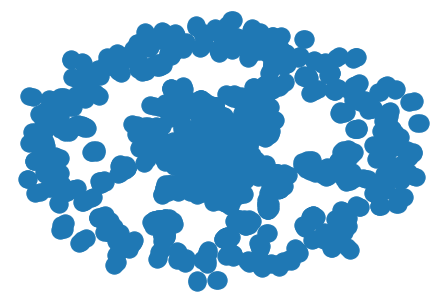

In [16]:
g = nx.from_pandas_edgelist(edges_df, source='source', target='target') 
nx.draw(g)

In [17]:
#first compute the best partition
# from community import greedy_modularity_communities
import community

G = g

#Two methods for community analysis
# c = greedy_modularity_communities(G)
partition = community.best_partition(G)

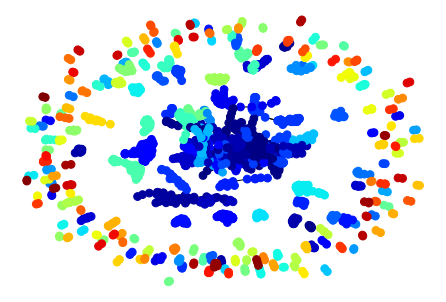

In [18]:
values = [partition.get(node) for node in G.nodes()]

nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size=60, with_labels=False)

In [15]:
# num_nodes = 0
# for community in c:
#     num_nodes += len(community)
# print(num_nodes)

In [19]:
len(partition)

2068

In [20]:
#Noes only connected by edges. Does not include standalone nodes.

list = partition.items()
print(len(list))
df_with_groupids = pd.DataFrame(list, columns=['Code', 'group_id'])
df_with_groupids.head()

2068


,Code,group_id
0,B_01_062,0
1,A_01_002,0
2,C_03_023,0
3,G_01_038,1
4,J_03_046,0


In [21]:
# get edges only where source and target nodes belong to a valid community for now. This is to assign them group ids.
nodes_in_communities = df_with_groupids['Code'].unique()
edges_for_community_nodes_df = edges_df.loc[edges_df['source'].isin(nodes_in_communities) & edges_df['target'].isin(nodes_in_communities)]
print(len(edges_for_community_nodes_df['source'].unique()))
print(edges_df.shape)
print(edges_for_community_nodes_df.shape)
edges_for_community_nodes_df.head()

2068
(13556, 6)
(13556, 6)


,target,source,num_matched_features,matched_features,num_missed_features,missed_features
0,A_01_002,B_01_062,12,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",1,RepeatedMovement.2.0
1,A_01_002,C_03_023,12,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",1,Flexion.2.0
2,A_01_002,G_01_038,12,"SignType.2.0, MinorLocation.2.0, Contact.2.0, ...",1,Movement.2.0
3,A_01_002,J_03_046,12,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",1,RepeatedMovement.2.0
4,A_01_003,D_02_047,14,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",0,NaN


In [22]:

df_merged = pd.merge(df_default, df_with_groupids,how='left', on=['Code'])
print(df_merged.shape)
df_merged.head(20)

(2723, 190)


,EntryID,LemmaID,Code,Batch,List,Item,EnglishWF(lg10),SignFrequency(M),SignFrequency(SD),SignFrequency(Z),...,SignBankReferenceID,InCDI,CDISemanticCategory,bglm_aoa,empirical_aoa,YouTube Video,VimeoVideo,VimeoVideoHTML,HandshapeImage,group_id
0,tree,tree,A_01_002,A,1,2,3.521,5.143,2.081,0.621,...,342.0,Yes,Outside Things and Places to Go,22.0,14.0,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216264,<iframe src=https://player.vimeo.com/video/344...,"<img width=""100"" height=""100"" src=""https://asl...",0.0
1,night,night,A_01_003,A,1,3,4.645,6.032,1.516,1.068,...,199.0,Yes,Signs About Time,31.0,18.0,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216312,<iframe src=https://player.vimeo.com/video/344...,"<img width=""100"" height=""100"" src=""https://asl...",2.0
2,hamburger,hamburger,A_01_004,A,1,4,2.600,4.429,1.720,0.232,...,1844.0,Yes,Food and Drink,32.0,28.0,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216345,<iframe src=https://player.vimeo.com/video/344...,"<img width=""100"" height=""100"" src=""https://asl...",3.0
3,nephew,nephew,A_01_005,A,1,5,2.928,2.621,1.720,-0.753,...,3011.0,No,NaN,NaN,NaN,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216367,<iframe src=https://player.vimeo.com/video/344...,"<img width=""100"" height=""100"" src=""https://asl...",NaN
4,castle,castle,A_01_008,A,1,8,3.041,1.579,0.838,-1.198,...,2471.0,No,Action Signs,NaN,NaN,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216403,<iframe src=https://player.vimeo.com/video/344...,"<img width=""100"" height=""100"" src=""https://asl...",4.0
5,humble,humble,A_01_009,A,1,9,2.700,3.200,1.031,-0.418,...,2940.0,No,NaN,NaN,NaN,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216431,<iframe src=https://player.vimeo.com/video/344...,"<img width=""100"" height=""100"" src=""https://asl...",5.0
6,cup,cup,A_01_010,A,1,10,3.421,5.742,1.413,0.909,...,388.0,No,NaN,NaN,NaN,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216455,<iframe src=https://player.vimeo.com/video/344...,"<img width=""100"" height=""100"" src=""https://asl...",6.0
7,english,english,A_01_011,A,1,11,3.577,4.645,1.496,0.326,...,1311.0,No,NaN,NaN,NaN,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216483,<iframe src=https://player.vimeo.com/video/344...,"<img width=""100"" height=""100"" src=""https://asl...",NaN
8,eyeglasses,eyeglasses,A_01_012,A,1,12,1.544,3.905,1.221,0.329,...,468.0,No,NaN,NaN,NaN,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216509,<iframe src=https://player.vimeo.com/video/344...,"<img width=""100"" height=""100"" src=""https://asl...",NaN
9,tie,tie,A_01_013,A,1,13,3.355,2.143,1.195,-0.751,...,3143.0,No,NaN,NaN,NaN,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216543,<iframe src=https://player.vimeo.com/video/344...,"<img width=""100"" height=""100"" src=""https://asl...",7.0


In [23]:
values = {'group_id': 1000}
df_merged = df_merged.fillna(value=values)

print(df_merged['group_id'])
unique_community_ids = df_merged['group_id'].unique()
unique_community_ids

0          0.0
1          2.0
2          3.0
3       1000.0
4          4.0
         ...  
2718    1000.0
2719       5.0
2720    1000.0
2721       3.0
2722      92.0
Name: group_id, Length: 2723, dtype: float64


array([   0.,    2.,    3., 1000.,    4.,    5.,    6.,    7.,    8.,
          9.,   10.,   11.,   12.,   13.,   14.,   15.,   16.,    1.,
         17.,   18.,   19.,   20.,   21.,   22.,   23.,   24.,   25.,
         26.,   27.,   28.,   29.,   30.,   31.,   32.,   33.,   34.,
         35.,   36.,   37.,   38.,   39.,   40.,   41.,   42.,   43.,
         44.,   45.,   46.,   47.,   48.,   49.,   50.,   51.,   52.,
         53.,   54.,   55.,   56.,   57.,   58.,   59.,   60.,   61.,
         62.,   63.,   64.,   65.,   66.,   67.,   68.,   69.,   70.,
         71.,   72.,   73.,   74.,   75.,   76.,   77.,   78.,   79.,
         80.,   81.,   82.,   83.,   84.,   85.,   86.,   87.,   88.,
         89.,   90.,   91.,   92.,   93.,   94.,   95.,   96.,   97.,
         98.,   99.,  100.,  101.,  102.,  103.,  104.,  105.,  106.,
        107.,  108.,  109.,  110.,  111.,  112.,  113.,  114.,  115.,
        116.,  117.,  118.,  119.,  120.,  121.,  122.,  123.,  124.,
        125.,  126.,

In [24]:

#Will assign all NaN's same color for now. That's okay.


import random
 
def colors(n):
    if(n == 0):
        n = 600
    r = int(random.random() * 256)
    g = int(random.random() * 256)
    b = int(random.random() * 256)
    
    step = 256 / n
#     print(n,r,g,b,step)

    r += step
    g += step
    b += step
    r = int(r) % 256
    g = int(g) % 256
    b = int(b) % 256
    
    colorstr = str(r)+","+str(b)+"," + str(g)
    return '#%02x%02x%02x' % (r, g, b)

color_dict = []
color_dictionary = {}
for groupid in unique_community_ids:
    #generate a random color
    color = colors(groupid)
    if(groupid == 1000):        
        color_dict.append({'group_id': 1000, 'color_code': color})
        color_dictionary['island'] = color
    else:        
        color_dict.append({'group_id':groupid , 'color_code': color})
        color_dictionary[str(int(groupid))] = color
    
color_dict

[{'group_id': 0.0, 'color_code': '#526bad'},
 {'group_id': 2.0, 'color_code': '#54b3cc'},
 {'group_id': 3.0, 'color_code': '#f53140'},
 {'group_id': 1000, 'color_code': '#f7f068'},
 {'group_id': 4.0, 'color_code': '#cfdf34'},
 {'group_id': 5.0, 'color_code': '#794cfd'},
 {'group_id': 6.0, 'color_code': '#80a048'},
 {'group_id': 7.0, 'color_code': '#dab74a'},
 {'group_id': 8.0, 'color_code': '#b866ff'},
 {'group_id': 9.0, 'color_code': '#158cac'},
 {'group_id': 10.0, 'color_code': '#5b0d19'},
 {'group_id': 11.0, 'color_code': '#dcb1d5'},
 {'group_id': 12.0, 'color_code': '#dcb863'},
 {'group_id': 13.0, 'color_code': '#4835dd'},
 {'group_id': 14.0, 'color_code': '#87a823'},
 {'group_id': 15.0, 'color_code': '#c5a17e'},
 {'group_id': 16.0, 'color_code': '#6621c4'},
 {'group_id': 1.0, 'color_code': '#17d018'},
 {'group_id': 17.0, 'color_code': '#008317'},
 {'group_id': 18.0, 'color_code': '#862f16'},
 {'group_id': 19.0, 'color_code': '#af473a'},
 {'group_id': 20.0, 'color_code': '#e0860b'}

In [25]:
from IPython.display import Markdown
for color in color_dict:
    display (Markdown('<br><span style="color:' +color['color_code']+ '">Sample</span>.'))
    


<br><span style="color:#526bad">Sample</span>.

<br><span style="color:#54b3cc">Sample</span>.

<br><span style="color:#f53140">Sample</span>.

<br><span style="color:#f7f068">Sample</span>.

<br><span style="color:#cfdf34">Sample</span>.

<br><span style="color:#794cfd">Sample</span>.

<br><span style="color:#80a048">Sample</span>.

<br><span style="color:#dab74a">Sample</span>.

<br><span style="color:#b866ff">Sample</span>.

<br><span style="color:#158cac">Sample</span>.

<br><span style="color:#5b0d19">Sample</span>.

<br><span style="color:#dcb1d5">Sample</span>.

<br><span style="color:#dcb863">Sample</span>.

<br><span style="color:#4835dd">Sample</span>.

<br><span style="color:#87a823">Sample</span>.

<br><span style="color:#c5a17e">Sample</span>.

<br><span style="color:#6621c4">Sample</span>.

<br><span style="color:#17d018">Sample</span>.

<br><span style="color:#008317">Sample</span>.

<br><span style="color:#862f16">Sample</span>.

<br><span style="color:#af473a">Sample</span>.

<br><span style="color:#e0860b">Sample</span>.

<br><span style="color:#399681">Sample</span>.

<br><span style="color:#f4ef57">Sample</span>.

<br><span style="color:#134ee1">Sample</span>.

<br><span style="color:#cef71f">Sample</span>.

<br><span style="color:#4f7435">Sample</span>.

<br><span style="color:#2a8e0a">Sample</span>.

<br><span style="color:#5445dc">Sample</span>.

<br><span style="color:#c648fe">Sample</span>.

<br><span style="color:#b79152">Sample</span>.

<br><span style="color:#570858">Sample</span>.

<br><span style="color:#9db7e1">Sample</span>.

<br><span style="color:#eb4b5d">Sample</span>.

<br><span style="color:#84f5f3">Sample</span>.

<br><span style="color:#e0b4ef">Sample</span>.

<br><span style="color:#631e55">Sample</span>.

<br><span style="color:#0c975d">Sample</span>.

<br><span style="color:#e1afe3">Sample</span>.

<br><span style="color:#6ee348">Sample</span>.

<br><span style="color:#9ea935">Sample</span>.

<br><span style="color:#34bade">Sample</span>.

<br><span style="color:#983824">Sample</span>.

<br><span style="color:#00c9eb">Sample</span>.

<br><span style="color:#25a426">Sample</span>.

<br><span style="color:#feff03">Sample</span>.

<br><span style="color:#a12609">Sample</span>.

<br><span style="color:#11f057">Sample</span>.

<br><span style="color:#5c9850">Sample</span>.

<br><span style="color:#e82415">Sample</span>.

<br><span style="color:#af4cdd">Sample</span>.

<br><span style="color:#05573c">Sample</span>.

<br><span style="color:#f4f6dc">Sample</span>.

<br><span style="color:#dce8ab">Sample</span>.

<br><span style="color:#88094a">Sample</span>.

<br><span style="color:#dc449c">Sample</span>.

<br><span style="color:#ea37cb">Sample</span>.

<br><span style="color:#7d3bb1">Sample</span>.

<br><span style="color:#94a79d">Sample</span>.

<br><span style="color:#4102da">Sample</span>.

<br><span style="color:#2ec10c">Sample</span>.

<br><span style="color:#a58022">Sample</span>.

<br><span style="color:#ba043a">Sample</span>.

<br><span style="color:#2c7094">Sample</span>.

<br><span style="color:#56b30b">Sample</span>.

<br><span style="color:#24c658">Sample</span>.

<br><span style="color:#674afb">Sample</span>.

<br><span style="color:#ff4348">Sample</span>.

<br><span style="color:#0acc2c">Sample</span>.

<br><span style="color:#c6636c">Sample</span>.

<br><span style="color:#219840">Sample</span>.

<br><span style="color:#ceb93a">Sample</span>.

<br><span style="color:#dc8cf1">Sample</span>.

<br><span style="color:#7c3410">Sample</span>.

<br><span style="color:#9b91b8">Sample</span>.

<br><span style="color:#c63349">Sample</span>.

<br><span style="color:#e6489b">Sample</span>.

<br><span style="color:#a61876">Sample</span>.

<br><span style="color:#e761cd">Sample</span>.

<br><span style="color:#408556">Sample</span>.

<br><span style="color:#935370">Sample</span>.

<br><span style="color:#17a35c">Sample</span>.

<br><span style="color:#be650a">Sample</span>.

<br><span style="color:#3e1dc8">Sample</span>.

<br><span style="color:#6d3464">Sample</span>.

<br><span style="color:#f5b2db">Sample</span>.

<br><span style="color:#4adc3e">Sample</span>.

<br><span style="color:#59b298">Sample</span>.

<br><span style="color:#ccdce2">Sample</span>.

<br><span style="color:#097fc1">Sample</span>.

<br><span style="color:#0729fb">Sample</span>.

<br><span style="color:#c06ff8">Sample</span>.

<br><span style="color:#37b131">Sample</span>.

<br><span style="color:#5bacb9">Sample</span>.

<br><span style="color:#5be738">Sample</span>.

<br><span style="color:#f41947">Sample</span>.

<br><span style="color:#6f90ec">Sample</span>.

<br><span style="color:#75f073">Sample</span>.

<br><span style="color:#f4cf16">Sample</span>.

<br><span style="color:#4f7cea">Sample</span>.

<br><span style="color:#0e665d">Sample</span>.

<br><span style="color:#f9b8f5">Sample</span>.

<br><span style="color:#eb7d0a">Sample</span>.

<br><span style="color:#eb9778">Sample</span>.

<br><span style="color:#1e8fc4">Sample</span>.

<br><span style="color:#e90db2">Sample</span>.

<br><span style="color:#a50465">Sample</span>.

<br><span style="color:#0956fa">Sample</span>.

<br><span style="color:#41aa01">Sample</span>.

<br><span style="color:#456765">Sample</span>.

<br><span style="color:#a2f3b4">Sample</span>.

<br><span style="color:#8bae23">Sample</span>.

<br><span style="color:#c3984a">Sample</span>.

<br><span style="color:#121f8e">Sample</span>.

<br><span style="color:#a79010">Sample</span>.

<br><span style="color:#d601d2">Sample</span>.

<br><span style="color:#1c55f1">Sample</span>.

<br><span style="color:#7f80c9">Sample</span>.

<br><span style="color:#197453">Sample</span>.

<br><span style="color:#1c85fd">Sample</span>.

<br><span style="color:#524aca">Sample</span>.

<br><span style="color:#00f91b">Sample</span>.

<br><span style="color:#6eec08">Sample</span>.

<br><span style="color:#d9a62f">Sample</span>.

<br><span style="color:#7261d7">Sample</span>.

<br><span style="color:#dc60a5">Sample</span>.

<br><span style="color:#daf860">Sample</span>.

<br><span style="color:#c33d73">Sample</span>.

<br><span style="color:#8761b2">Sample</span>.

<br><span style="color:#8cc600">Sample</span>.

<br><span style="color:#da95c2">Sample</span>.

<br><span style="color:#2044fb">Sample</span>.

<br><span style="color:#20c5e3">Sample</span>.

<br><span style="color:#44bf17">Sample</span>.

<br><span style="color:#422579">Sample</span>.

<br><span style="color:#3eade7">Sample</span>.

<br><span style="color:#329791">Sample</span>.

<br><span style="color:#8d8308">Sample</span>.

<br><span style="color:#c9e896">Sample</span>.

<br><span style="color:#8b2c4f">Sample</span>.

<br><span style="color:#5bcb53">Sample</span>.

<br><span style="color:#a90aef">Sample</span>.

<br><span style="color:#19c27b">Sample</span>.

<br><span style="color:#12683e">Sample</span>.

<br><span style="color:#495ea3">Sample</span>.

<br><span style="color:#241573">Sample</span>.

<br><span style="color:#89e7af">Sample</span>.

<br><span style="color:#8a4171">Sample</span>.

<br><span style="color:#a01430">Sample</span>.

<br><span style="color:#9b05c8">Sample</span>.

<br><span style="color:#98260f">Sample</span>.

<br><span style="color:#acf582">Sample</span>.

<br><span style="color:#0d95a9">Sample</span>.

<br><span style="color:#286112">Sample</span>.

<br><span style="color:#62b4ff">Sample</span>.

<br><span style="color:#d38a14">Sample</span>.

<br><span style="color:#1691ee">Sample</span>.

<br><span style="color:#b433a3">Sample</span>.

<br><span style="color:#2cbf23">Sample</span>.

<br><span style="color:#56fbf7">Sample</span>.

<br><span style="color:#8e5042">Sample</span>.

<br><span style="color:#491f02">Sample</span>.

<br><span style="color:#e59eb9">Sample</span>.

<br><span style="color:#f05f16">Sample</span>.

<br><span style="color:#1fa1a1">Sample</span>.

<br><span style="color:#7fe739">Sample</span>.

<br><span style="color:#d5510c">Sample</span>.

<br><span style="color:#5240e8">Sample</span>.

<br><span style="color:#18050b">Sample</span>.

<br><span style="color:#597d9b">Sample</span>.

<br><span style="color:#1e1de4">Sample</span>.

<br><span style="color:#72f32b">Sample</span>.

<br><span style="color:#0fdb96">Sample</span>.

<br><span style="color:#0cf95d">Sample</span>.

<br><span style="color:#bb9073">Sample</span>.

<br><span style="color:#f30dbe">Sample</span>.

<br><span style="color:#c30edc">Sample</span>.

<br><span style="color:#1aeb53">Sample</span>.

<br><span style="color:#ff11fb">Sample</span>.

<br><span style="color:#ca67a7">Sample</span>.

<br><span style="color:#25386a">Sample</span>.

<br><span style="color:#037cf9">Sample</span>.

<br><span style="color:#329b9b">Sample</span>.

<br><span style="color:#0cba08">Sample</span>.

<br><span style="color:#4a6166">Sample</span>.

<br><span style="color:#728c53">Sample</span>.

<br><span style="color:#437c4b">Sample</span>.

<br><span style="color:#4559bf">Sample</span>.

<br><span style="color:#396319">Sample</span>.

<br><span style="color:#919bab">Sample</span>.

<br><span style="color:#67a1bb">Sample</span>.

<br><span style="color:#fee75c">Sample</span>.

<br><span style="color:#6c8e18">Sample</span>.

<br><span style="color:#ae078d">Sample</span>.

<br><span style="color:#8cf49a">Sample</span>.

<br><span style="color:#cf8689">Sample</span>.

<br><span style="color:#2f56df">Sample</span>.

<br><span style="color:#9b8883">Sample</span>.

<br><span style="color:#777667">Sample</span>.

<br><span style="color:#a40c81">Sample</span>.

<br><span style="color:#14de1c">Sample</span>.

<br><span style="color:#17d7f4">Sample</span>.

<br><span style="color:#fbc7b5">Sample</span>.

<br><span style="color:#2fffef">Sample</span>.

<br><span style="color:#86309f">Sample</span>.

<br><span style="color:#c9ea4b">Sample</span>.

<br><span style="color:#ef826f">Sample</span>.

<br><span style="color:#80e60a">Sample</span>.

<br><span style="color:#fc1627">Sample</span>.

<br><span style="color:#4fe8b0">Sample</span>.

<br><span style="color:#d37f6f">Sample</span>.

<br><span style="color:#6977b2">Sample</span>.

<br><span style="color:#18665a">Sample</span>.

<br><span style="color:#c82193">Sample</span>.

<br><span style="color:#e9ddad">Sample</span>.

<br><span style="color:#950db3">Sample</span>.

<br><span style="color:#8abd0d">Sample</span>.

<br><span style="color:#ca222c">Sample</span>.

<br><span style="color:#bff28e">Sample</span>.

<br><span style="color:#7fc4c7">Sample</span>.

<br><span style="color:#780fd0">Sample</span>.

In [26]:
color_df = pd.DataFrame(color_dict)
df_merged_with_color = pd.merge(df_merged, color_df,how='left', on=['group_id'])
print(df_merged_with_color.shape)
df_merged_with_color.head()


(2723, 191)


,EntryID,LemmaID,Code,Batch,List,Item,EnglishWF(lg10),SignFrequency(M),SignFrequency(SD),SignFrequency(Z),...,InCDI,CDISemanticCategory,bglm_aoa,empirical_aoa,YouTube Video,VimeoVideo,VimeoVideoHTML,HandshapeImage,group_id,color_code
0,tree,tree,A_01_002,A,1,2,3.521,5.143,2.081,0.621,...,Yes,Outside Things and Places to Go,22.0,14.0,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216264,<iframe src=https://player.vimeo.com/video/344...,"<img width=""100"" height=""100"" src=""https://asl...",0.0,#526bad
1,night,night,A_01_003,A,1,3,4.645,6.032,1.516,1.068,...,Yes,Signs About Time,31.0,18.0,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216312,<iframe src=https://player.vimeo.com/video/344...,"<img width=""100"" height=""100"" src=""https://asl...",2.0,#54b3cc
2,hamburger,hamburger,A_01_004,A,1,4,2.600,4.429,1.720,0.232,...,Yes,Food and Drink,32.0,28.0,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216345,<iframe src=https://player.vimeo.com/video/344...,"<img width=""100"" height=""100"" src=""https://asl...",3.0,#f53140
3,nephew,nephew,A_01_005,A,1,5,2.928,2.621,1.720,-0.753,...,No,NaN,NaN,NaN,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216367,<iframe src=https://player.vimeo.com/video/344...,"<img width=""100"" height=""100"" src=""https://asl...",1000.0,#f7f068
4,castle,castle,A_01_008,A,1,8,3.041,1.579,0.838,-1.198,...,No,Action Signs,NaN,NaN,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216403,<iframe src=https://player.vimeo.com/video/344...,"<img width=""100"" height=""100"" src=""https://asl...",4.0,#cfdf34


In [27]:
df_merged_with_color.shape

(2723, 191)

In [28]:
#Need only 5 columns for now for the graph file
df_node_graph_json_data = df_merged_with_color[["EntryID", "Code", "group_id", "color_code", "SignFrequency(Z)"]]
print(df_node_graph_json_data.shape)
df_node_graph_json_data.head(20)


(2723, 5)


,EntryID,Code,group_id,color_code,SignFrequency(Z)
0,tree,A_01_002,0.0,#526bad,0.621
1,night,A_01_003,2.0,#54b3cc,1.068
2,hamburger,A_01_004,3.0,#f53140,0.232
3,nephew,A_01_005,1000.0,#f7f068,-0.753
4,castle,A_01_008,4.0,#cfdf34,-1.198
5,humble,A_01_009,5.0,#794cfd,-0.418
6,cup,A_01_010,6.0,#80a048,0.909
7,english,A_01_011,1000.0,#f7f068,0.326
8,eyeglasses,A_01_012,1000.0,#f7f068,0.329
9,tie,A_01_013,7.0,#dab74a,-0.751


In [29]:
edges_df.head()

,target,source,num_matched_features,matched_features,num_missed_features,missed_features
0,A_01_002,B_01_062,12,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",1,RepeatedMovement.2.0
1,A_01_002,C_03_023,12,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",1,Flexion.2.0
2,A_01_002,G_01_038,12,"SignType.2.0, MinorLocation.2.0, Contact.2.0, ...",1,Movement.2.0
3,A_01_002,J_03_046,12,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",1,RepeatedMovement.2.0
4,A_01_003,D_02_047,14,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",0,NaN


In [30]:
not_need_edge_cols = ['num_matched_features', 'matched_features', 'num_missed_features', 'missed_features']
links_df = edges_df.drop(columns=not_need_edge_cols)
links_df.head()

,target,source
0,A_01_002,B_01_062
1,A_01_002,C_03_023
2,A_01_002,G_01_038
3,A_01_002,J_03_046
4,A_01_003,D_02_047


In [31]:
edges_json_str = links_df.to_json(orient="records")
edges_json = json.loads(edges_json_str)
edges_json[0]

{'target': 'A_01_002', 'source': 'B_01_062'}

In [32]:
# cols_not_in_sign_pane = ["LemmaID", "SignFrequency(SD)","SignFrequency(Z)","SignFrequency(N)","SignFrequency(M-Native)","SignFrequency(SD-Native)","SignFreq(Z-native)","SignFrequency(N-Native)","PercentUnknown(Native)","PercentGlossAgreement(Native)","SignFrequency(M-Nonnative)","SignFrequency(SD-Nonnative)","SignFreq(Z-Nonnative)","SignFrequency(N-Nonnative)","PercentUnknown(Nonnative)","PercentGlossAgreement(Nonnative)","Iconicity(SD)","Iconicity(Z)","Iconicity(N)","Iconicity_ID","D.Iconicity(SD) all","D.Iconicity(Z) all","D.Iconicity(N) all","D.Iconicity(M) native","D.Iconicity(SD) native","D.Iconicity(Z) native","D.Iconicity(N) native","Transparency SD","Transparency Z","SignOnset(ms)","SignOffset(ms)","SignType 1.0","MajorLocation 1.0","MinorLocation 1.0","SelectedFingers 1.0","Compound 1.0","Flexion 1.0","Initialized 1.0","Movement 1.0","MinimalNeighborhoodDensity","MaximalNeighborhoodDensity","Parameter-BasedNeighborhoodDensity","SignTypeFrequency","MajorLocationFrequency","MinorLocationFrequency","SelectedFingersFrequency","FlexionFrequency","MovementFrequency","HandshapeFrequency","Batch","Item","List","Source","InCDI","CDI_A","CDI_B","CDI_C","CDIGloss","CDI Semantic Category","CDIDuplicate","GlossConfirmation","CDIComment","In Frequency Rating Survey (FRS)?","FRS_A","FRS_B","FRS_C","FRS-Low Frequency item?","InPPVT","InEOWPVT","PPVTTargetFoil","PPVTPictureSource","FingerspelledLoanSign 1.0","Repeat.1","BatesPicture","BatesPicture: URL","ASLVocabPicture","ASLVocabPicture: URL","Possible Picture?","Possible Picture Comments","ASLVocab Picture Google Drive","ArtistInstructions","IssuesWithItemsAndGlosses","Brittany-Freq Comments","PPVT with Pictures","PPVT-Age Group","PPVT-Expressive","PPVT-Receptive","Entry ID","Bizarre Sign or Problematic Video","InUconnPPVT","CheckCompleteCoding","Video File","Video File: URL","IconicityTypeShannon","IconicityTypeClaire","IconicityTypeLindsay","IconicityTypeRotceh","In ASL-LEX 2.0","DraftIconicityID","DraftIconicityM","RightWristX","RightWristcentroidY","DistanceRightWristCentroid2Nose","IconicityType","ChelseaCoded","HandshapeManualCorrections","FormerKnackGloss","CodingSignBank","InZed","Checked Vimeo"]

In [33]:
# all columns in signdata.csv
cols_in_sign_data = df_default.columns.values

In [34]:
# df_merged_with_color[["EntryID","SignFrequency(M)","PercentUnknown"]]

In [35]:
df_merged_with_color.columns.tolist()

['EntryID',
 'LemmaID',
 'Code',
 'Batch',
 'List',
 'Item',
 'EnglishWF(lg10)',
 'SignFrequency(M)',
 'SignFrequency(SD)',
 'SignFrequency(Z)',
 'SignFrequency(N)',
 'Unknown',
 'SignFrequency(M-Native)',
 'SignFrequency(SD-Native)',
 'SignFreq(Z-native)',
 'SignFrequency(N-Native)',
 'Unknown(Native)',
 'SignFrequency(M-Nonnative)',
 'SignFrequency(SD-Nonnative)',
 'SignFrequency(N-Nonnative)',
 'SignFreq(Z-Nonnative)',
 'Unknown(Nonnative)',
 'DominantTranslation',
 'DominantTranslationAgreement',
 'DominantTranslationAgreement(Native)',
 'DominantTranslationAgreement(Nonnative)',
 'NondominantTranslations',
 'Iconicity(M)',
 'Iconicity(SD)',
 'Iconicity(Z)',
 'Iconicity(N)',
 'Iconicity_ID',
 'IconicityType',
 'D.Iconicity(M)',
 'D.Iconicity(SD)',
 'D.Iconicity(N)',
 'D.Iconicity(Z)',
 'D.Iconicity(M-native)',
 'D.Iconicity(SD-native)',
 'D.Iconicity(Z-native)',
 'D.Iconicity(N-native)',
 'GuessConsistency',
 'GuessAccuracy',
 'Transparency(M)',
 'Transparency SD',
 'Transparency Z

In [38]:
#### Get rid of morpheme columns
print(len(df_merged_with_color.columns.values))
# df_sign = df_sign[['YouTube Video','Code','SignBankEnglishTranslations', "VimeoVideo"]]
# df_sign = df_sign.rename(columns={"VimeoVideo": "video"}, errors="raise")
# df_sign.head()
# df_default = pd.merge(df_default, df_sign,how='left', on=['Code'])

test_df = df_merged_with_color
# filtered = test_df.filter(regex='M..2.0|Video')
for col in test_df.columns:
    if col not in cols_in_sign_data:
#         if col in test_df.columns:
        print("dropping " + col)
        test_df = test_df[test_df.columns.drop(col)]

no_morphemes_df = test_df
len(no_morphemes_df.columns.values)
# no_morphemes_df.columns.values

191
dropping group_id
dropping color_code


189

In [39]:
for col in cols_in_sign_data:
    if col not in test_df.columns:
        print("This column is not present: " + col)

In [40]:
### Add sign constraint range values
numerical_attr = no_morphemes_df.select_dtypes(include=['float', 'int']).columns.values
categorical_attr = []
for column in no_morphemes_df.columns.values:
    if column not in numerical_attr and column not in ['YouTube Video', 'VimeoVideoHTML', 'VimeoVideo', 'DominantTranslation', 'SignBankAnnotationID', 'SignBankEnglishTranslations', 'SignBankLemmaID', 'SignBankSemanticField']:
        categorical_attr.append(column)   
print(numerical_attr)
print(categorical_attr)

['List' 'Item' 'EnglishWF(lg10)' 'SignFrequency(M)' 'SignFrequency(SD)'
 'SignFrequency(Z)' 'SignFrequency(N)' 'Unknown' 'SignFrequency(M-Native)'
 'SignFrequency(SD-Native)' 'SignFreq(Z-native)' 'SignFrequency(N-Native)'
 'Unknown(Native)' 'SignFrequency(M-Nonnative)'
 'SignFrequency(SD-Nonnative)' 'SignFrequency(N-Nonnative)'
 'SignFreq(Z-Nonnative)' 'Unknown(Nonnative)'
 'DominantTranslationAgreement' 'DominantTranslationAgreement(Native)'
 'DominantTranslationAgreement(Nonnative)' 'Iconicity(M)' 'Iconicity(SD)'
 'Iconicity(Z)' 'Iconicity(N)' 'D.Iconicity(M)' 'D.Iconicity(SD)'
 'D.Iconicity(N)' 'D.Iconicity(Z)' 'D.Iconicity(M-native)'
 'D.Iconicity(SD-native)' 'D.Iconicity(Z-native)' 'D.Iconicity(N-native)'
 'GuessConsistency' 'GuessAccuracy' 'Transparency(M)' 'Transparency SD'
 'Transparency Z' 'Initialized.2.0' 'FingerspelledLoanSign.2.0'
 'Compound.2.0' 'NumberOfMorphemes.2.0' 'SignOnset(ms)' 'SignOffset(ms)'
 'SignDuration(ms)' 'ClipDuration(ms)' 'FlexionChange.2.0' 'Spread.2.0'

In [41]:
import math 
import pprint

constraints = {}
for attr in categorical_attr:
    if attr not in ['EntryID', 'LemmaID', 'Code', 'Iconicity_ID']:
        columnsData = no_morphemes_df.loc[ : , attr ].dropna()
        values_set = set(columnsData.values)
        constraints[attr] = [*values_set, ]
        
for attr in numerical_attr:    
    #drop nan values 
    columnsData = no_morphemes_df.loc[ : , attr ].dropna()
#     print(columnsData.values)
    constraints[attr] = {}  
    #print(math.floor(min(list(columnsData))), math.ceil(max(list(columnsData))), attr)
    if len(columnsData.values) > 0:
        constraints[attr]['min'] = math.floor(min(columnsData.values))
        constraints[attr]['max'] = math.ceil(max(columnsData.values))

In [42]:
nodes_json_str = df_node_graph_json_data.to_json(orient="records")
nodes_json = json.loads(nodes_json_str)
nodes_json[0]


{'EntryID': 'tree',
 'Code': 'A_01_002',
 'group_id': 0.0,
 'color_code': '#526bad',
 'SignFrequency(Z)': 0.621}

In [43]:
# write all the data frames to respective json files

graph = {
    "nodes" : nodes_json,
    "links": edges_json
}

with open("../data/generated-data/graph.json", 'w') as file:
    json.dump(graph, file)
    
    
with open('../data/generated-data/constraints.json', 'w') as fp:
    json.dump(constraints, fp)
    
no_morphemes_df.reset_index().to_json('../data/generated-data/sign_props.json', orient='records')


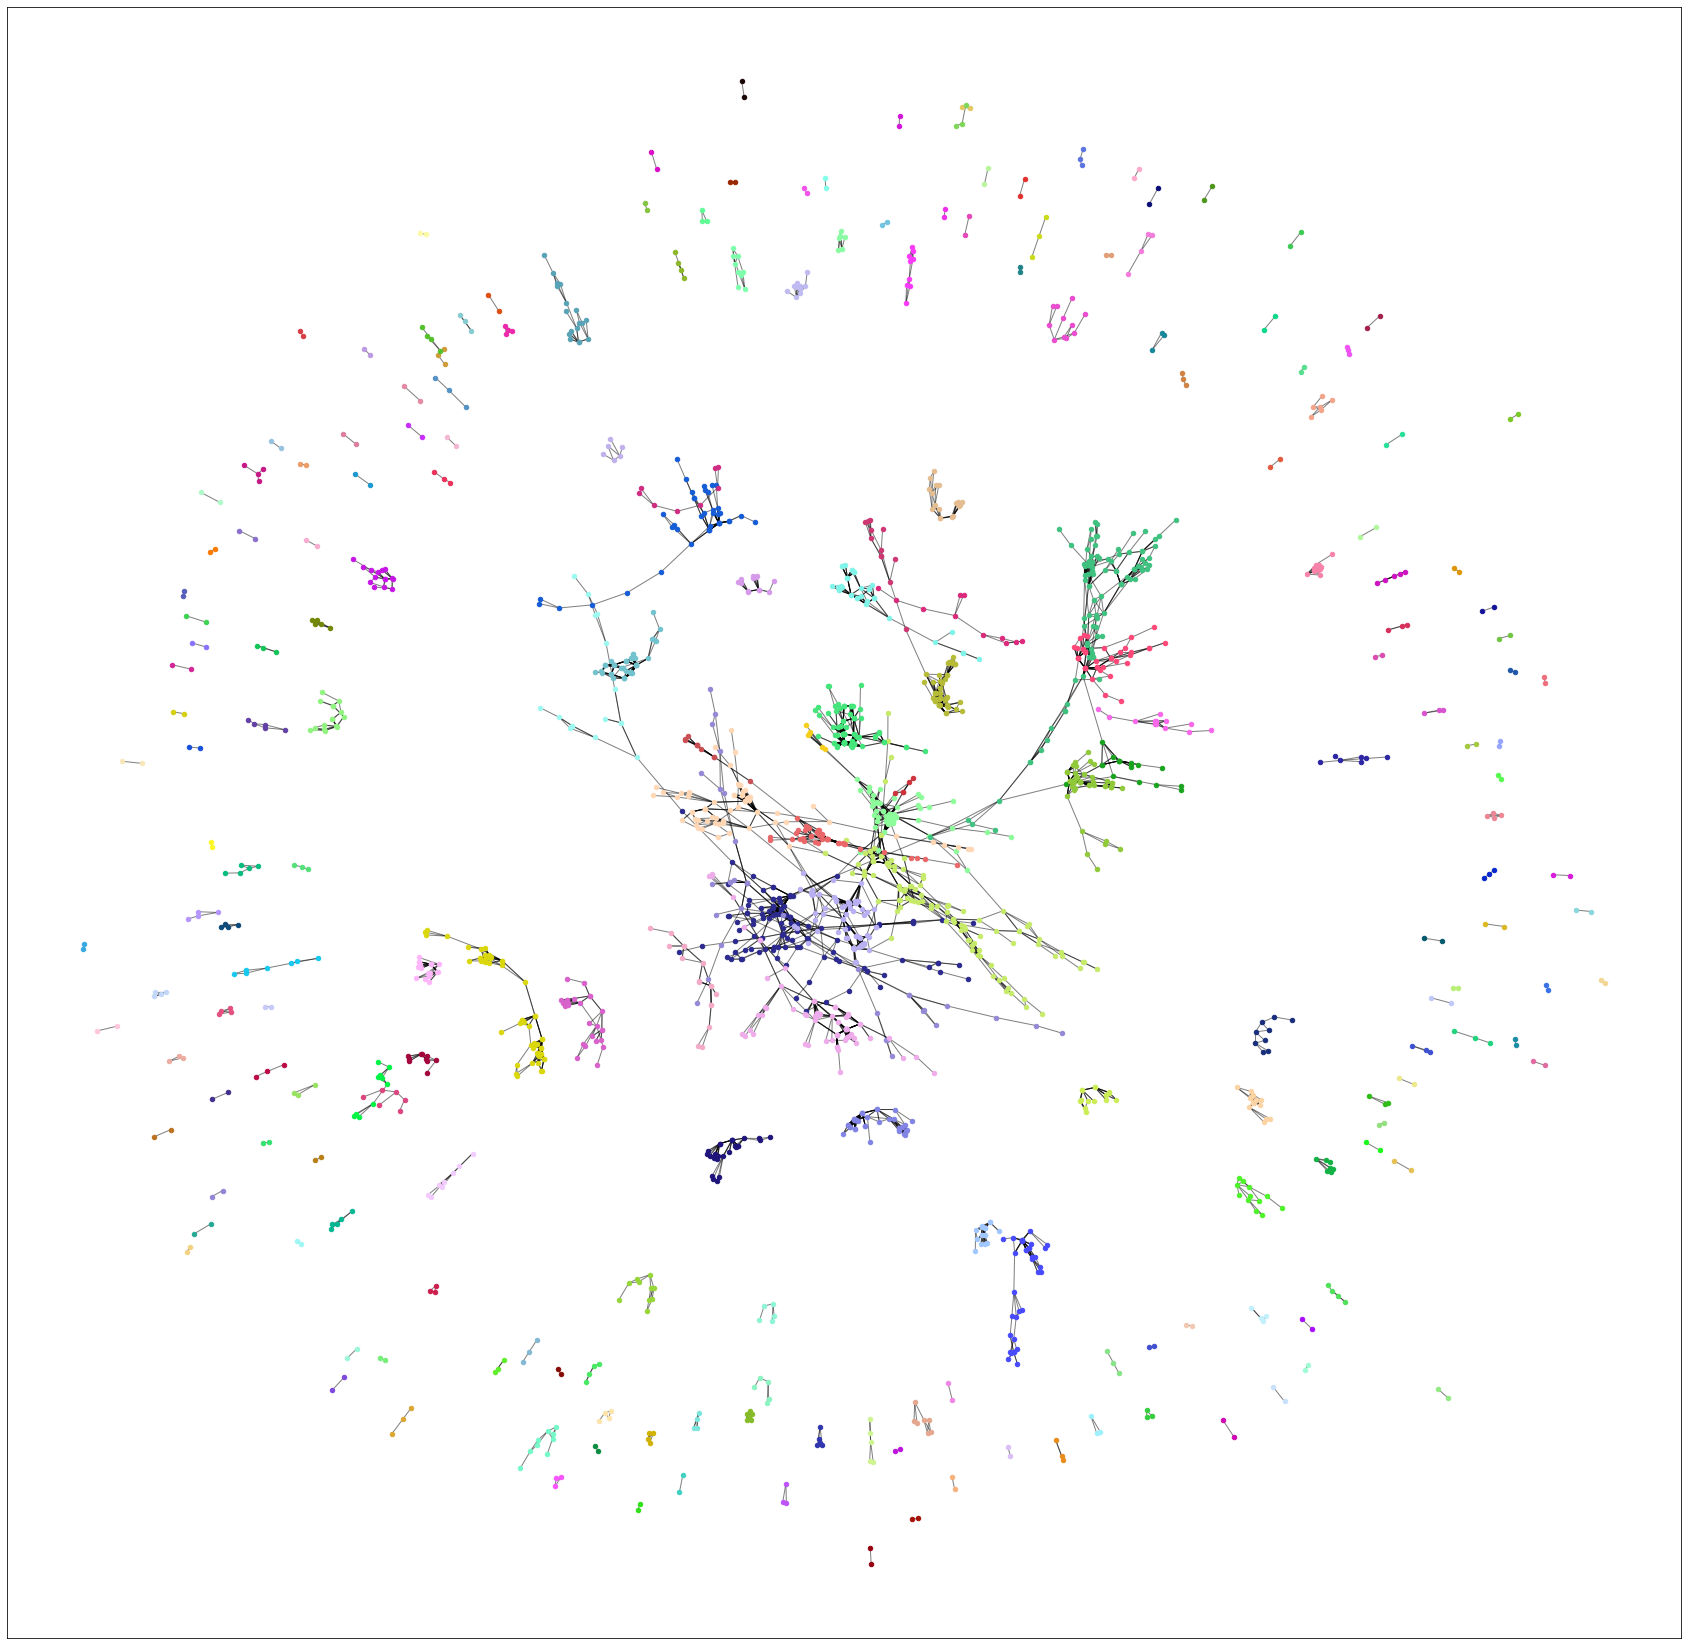

In [39]:
#drawing only nodes with edges
fig = plt.figure()
fig.set_figheight(30)
fig.set_figwidth(30)
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = randomcolor.RandomColor().generate()[0])


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [40]:
## Code to change color in json
color_dictionary


{'0': '#be1658',
 '2': '#3be444',
 '3': '#55db5c',
 'island': '#0bc5fc',
 '4': '#368084',
 '5': '#f760d2',
 '6': '#72c276',
 '7': '#009500',
 '8': '#3f6b5c',
 '9': '#1bea47',
 '10': '#60f90b',
 '11': '#027bf0',
 '12': '#73bdf2',
 '13': '#1fe538',
 '14': '#6fd3ad',
 '15': '#9144df',
 '16': '#5844eb',
 '1': '#9781c6',
 '17': '#ef44a6',
 '18': '#c7caa0',
 '19': '#45b836',
 '20': '#93ef4e',
 '21': '#100c47',
 '22': '#5b6ded',
 '23': '#88238e',
 '24': '#00bc98',
 '25': '#e8b96d',
 '26': '#224aed',
 '27': '#993ab9',
 '28': '#ae19d6',
 '29': '#e429e6',
 '30': '#1e8881',
 '31': '#5de65c',
 '32': '#df4b67',
 '33': '#26083e',
 '34': '#f1724d',
 '35': '#6aa130',
 '36': '#f9418c',
 '37': '#be8066',
 '38': '#668337',
 '39': '#905328',
 '40': '#1800c0',
 '41': '#1e87bc',
 '42': '#0fdd77',
 '43': '#df3b8e',
 '44': '#5a2e6e',
 '45': '#e0c12d',
 '46': '#fe2fc3',
 '47': '#2ecbd3',
 '48': '#0f714c',
 '49': '#ca4de0',
 '50': '#a045a0',
 '51': '#6d4b08',
 '52': '#bab299',
 '53': '#1fa353',
 '54': '#20c7ee'

In [41]:
###Only if you need to edit the graph json files

# def filter_dict(d, filter_string):
# #     print(filter_string)
#     for key, val in d.items():
#         if filter_string != key:
#             continue
#         return key, val

# with open('../../visualization/data/graph.json') as graph_json_file:
#     data = json.load(graph_json_file)
#     for node in data['nodes']:
#         if(node['group_id'] == ""):
#             node['group_id']= "island"    
# #             print(node)
    
#     for node in data['nodes']:
#         key,val = filter_dict(color_dictionary, str(node['group_id']))
#         node['color_code'] = val
#         print(node)


In [42]:
#Resave as JSON

# graph = {
#     "nodes" : data['nodes'],
#     "links": data['links']
# }

# with open("../generated-data/graph.json", 'w') as file:
#     json.dump(graph, file)

In [43]:
#signs_latest_csv = pd.read_csv('../signdata-07-08-2020.csv')

In [44]:
#signs_latest_csv['Iconicity(Z)'].max()